In [104]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from basic_epidemic import fit_model
from model import simulate
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from itertools import product
from grab_data import get_matrix, get_population_sizes
from basic_epidemic import visualise_fits
mpl.rcParams['figure.dpi'] = 300

In [106]:
flow_matrix = get_matrix()
pop_sizes = get_population_sizes()

In [107]:
s, i, r, t = simulate(beta=2.5, psi=0.8, gamma=0.4, pop_sizes=pop_sizes, od_matrix=flow_matrix)

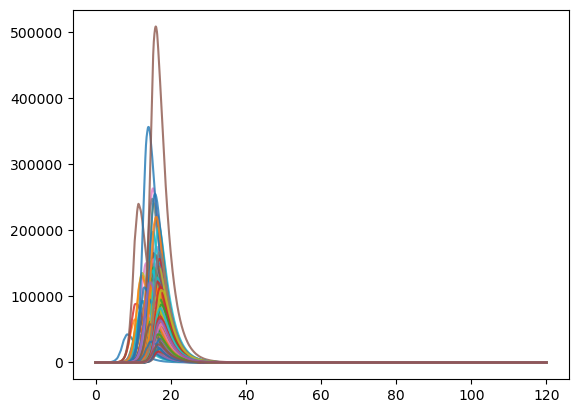

In [108]:
plt.plot(t, i.sum(axis=2)[:, ], alpha=.8)
plt.show()

# Fit basic model to this

In [109]:
data = s.sum(axis=2), i.sum(axis=2), r.sum(axis=2)

fit_model(data, flow_matrix, pop_sizes, t_delta=1 / 12)

(2.08077258866887, 0.40000147006875764, 0.8929018456126069)

In [110]:
def simulate_and_fit(flow_matrix, population_sizes, seed_patch=0, t_max=120, t_delta=1 / 12):
    true_params = list(product(np.linspace(1, 3, 8), np.linspace(0.2, 0.8, 5), np.array([0.9, 0.8, 0.7])))
    results = [[], [], []]
    for b, g, p in true_params:
        if b / g <= 1:
            continue
        s,i,r,time  = simulate(beta=b, psi=p, gamma=g, pop_sizes=pop_sizes, od_matrix=flow_matrix,
                                  delta=t_delta,
                                  t_max=t_max, seed=seed_patch)
        sim_data = s.sum(axis=2), i.sum(axis=2), r.sum(axis=2)
        # not interested in extinctions
        while sim_data[1].sum(axis=(0, 1)) <= 100:
            s,i,r,time = simulate(beta=b, psi=p, gamma=g, pop_sizes=pop_sizes, od_matrix=flow_matrix,
                                      delta=t_delta,
                                      t_max=t_max, seed=seed_patch)
            sim_data = s.sum(axis=2), i.sum(axis=2), r.sum(axis=2)
        b_hat, g_hat, psi_hat = fit_model(sim_data, flow_matrix, population_sizes, t_delta=t_delta)
        results[0].append(b_hat)
        results[1].append(g_hat)
        results[2].append(psi_hat)

    return np.array(true_params), np.array(results).T

In [111]:
res = simulate_and_fit(flow_matrix, pop_sizes)

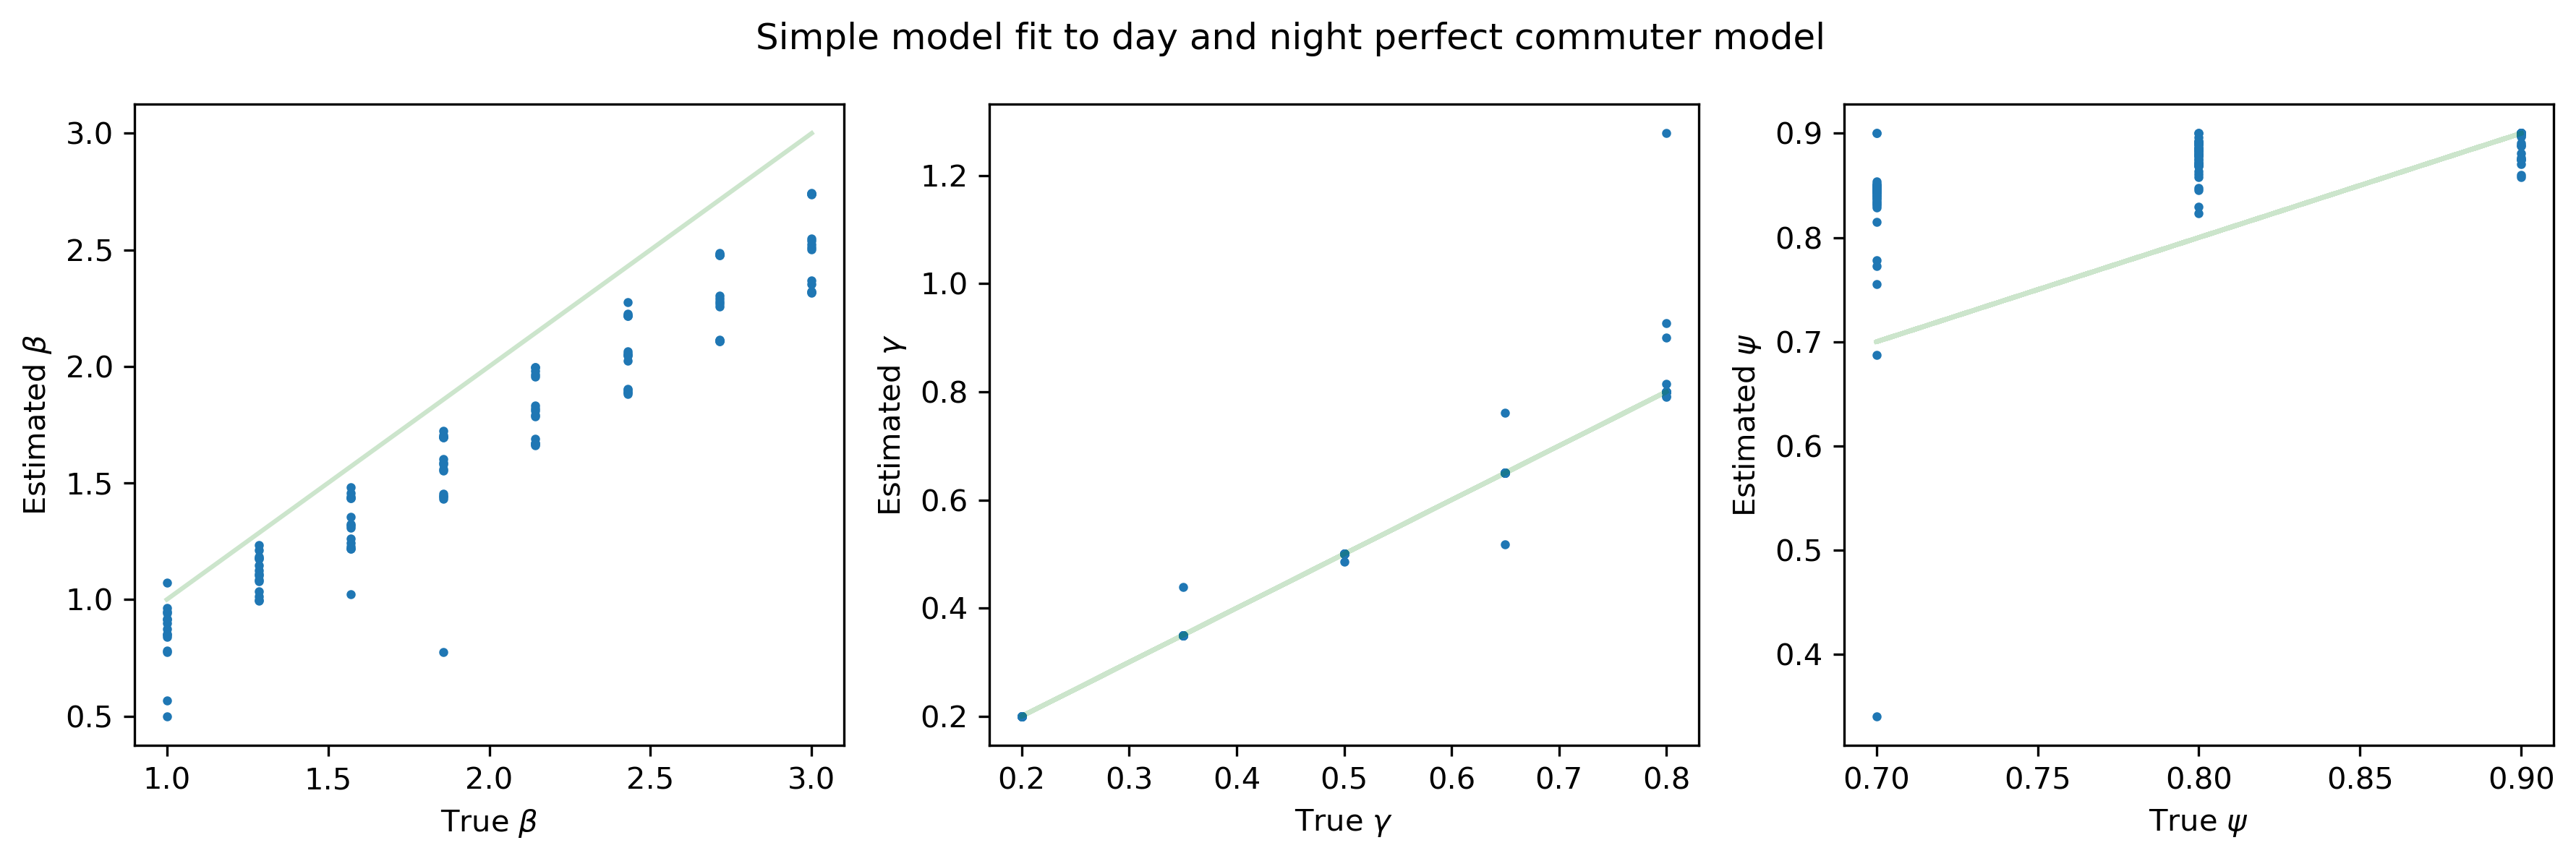

In [118]:
visualise_fits(*res, 'Simple model fit to day and night perfect commuter model')
